In [1]:
import numpy as np
from scipy.optimize import differential_evolution

In [24]:
import matplotlib.pyplot as plt

In [14]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42, popsize = 1000)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 198063
     nit: 98
 success: True
       x: array([0., 0.])

In [63]:
strategy_ = ["best1exp", "rand1exp", "randtobest1exp" ,"currenttobest1exp", "best2exp", "rand2exp", "randtobest1bin", 
             "currenttobest1bin", "best2bin", "rand2bin", "rand1bin"]

# popsize_ = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])

popsize_ = list(range(125,140))

tol_ = np.linspace(0.1 , 1, 10)

mutation_ = np.linspace(0.1 , 1.9, 20)

recombination_ = np.linspace(0.1 , 1, 10)

updating_ = ["immediate", "deferred"]


In [34]:
nit_strategy = []
strategy_p = []

for i in strategy_:
    result = differential_evolution(ackley, bounds, seed=42, strategy = i)
    strategy_p.append(i)
    nit_strategy.append(result.nit)


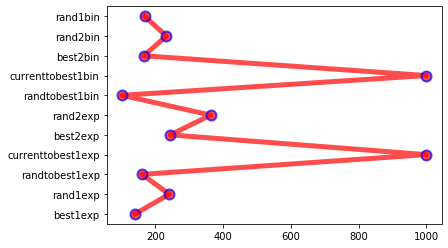

In [44]:
plt.plot(nit_strategy, strategy_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)



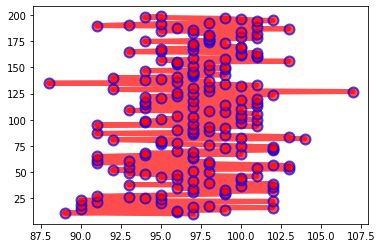

In [50]:
nit_popsize = []
popsize_p = []
popsize_ = list(range(10,200))

for i in popsize_:
    result = differential_evolution(ackley, bounds, seed=42, popsize = i)
    popsize_p.append(i)
    nit_popsize.append(result.nit)
    
plt.plot(nit_popsize, popsize_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)



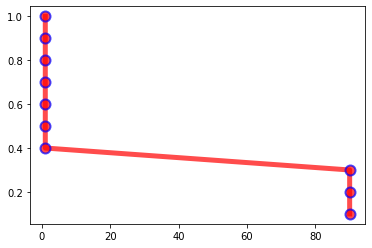

In [54]:
nit_tol = []
tol_p = []

for i in tol_:
    result = differential_evolution(ackley, bounds, seed=42, tol = i)
    tol_p.append(i)
    nit_tol.append(result.nit)
    
plt.plot(nit_tol, tol_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)

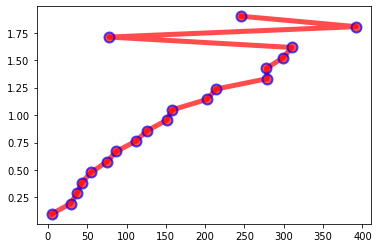

In [60]:
nit_mutation = []
mutation_p = []

for i in mutation_:
    result = differential_evolution(ackley, bounds, seed=42, mutation = i)
    mutation_p.append(i)
    nit_mutation.append(result.nit)
    
plt.plot(nit_mutation, mutation_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)

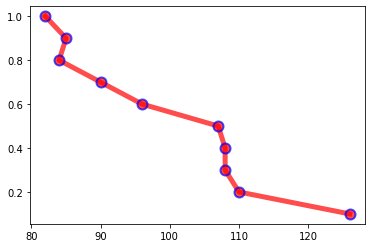

In [58]:
nit_recombination = []
recombination_p = []

for i in recombination_:
    result = differential_evolution(ackley, bounds, seed=42, recombination = i)
    recombination_p.append(i)
    nit_recombination.append(result.nit)
    
plt.plot(nit_recombination, recombination_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)

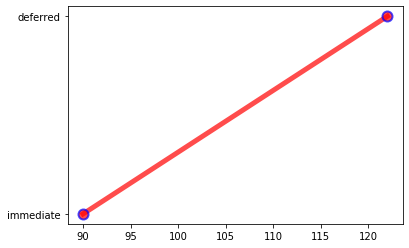

In [68]:
nit_updating = []
updating_p = []

for i in updating_:
    result = differential_evolution(ackley, bounds, seed=42, updating = i)
    updating_p.append(i)
    nit_updating.append(result.nit)
    
plt.plot(nit_updating, updating_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)

In [74]:
strategy_ = ["best1exp", "randtobest1exp" , "randtobest1bin", 
              "best2bin", "rand1bin"]


popsize_ = list(range(128,134))

tol_ = np.linspace(0.3 , 0.5, 3)

mutation_ = np.linspace(0.1 , 0.5, 3)

recombination_ = np.linspace(0.8 , 1, 2)

updating_ = ["immediate", "deferred"]

In [105]:
min_nit = 10000
min_param = []


min_p = []
min_n = []


for i_strategy in strategy_:  
    for i_popsize in popsize_:
        for i_mutation in mutation_:
            for i_recombination in recombination_:
                for i_updating in updating_:
                        result = differential_evolution(ackley, bounds, seed=42, updating = i_updating, 
                                                        recombination = i_recombination, mutation = i_mutation, 
                                                        popsize = i_popsize, strategy = i_strategy)                                                       
                        
                        k = i_strategy + '_' + str(i_popsize) + '_' + str(i_mutation) + '_' + str(i_recombination) + '_' + i_updating
                        
                        min_p.append(k)
                        min_n.append(result.nit) 
                        
                        if min_nit > result.nit :
                            min_nit = result.nit
                            min_param = k
                        
    

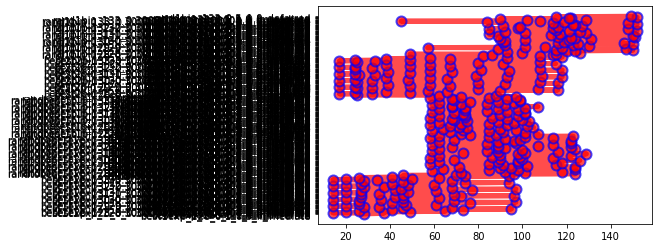

In [106]:
plt.plot(min_n, min_p, 'o-r', alpha=0.7,  lw=5, mec='b', mew=2, ms=10)

In [108]:
print("Минимум шагов ",min_nit)
print("Комбинация факторов ",min_param)


Минимум шагов  14
МКомбинация факторов  best1exp_128_0.1_1.0_immediate
